For these exercises I work with the Fashion-MNIST dataset, also available through torchvision. Like MNIST, this dataset consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes: 0. T-shirt/top

Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot


# Perform standard imports, load the Fashion-MNIST dataset

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root = '/Users/elifseven/Desktop/PytorchUdemy/Data',train=True,download=True,transform = transform)
test_data = datasets.FashionMNIST(root='/Users/elifseven/Desktop/PytorchUdemy/Data',train=False,download=True,transform = transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

# 1. Create data loaders



In [2]:
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

# 2. Examine a batch of images
Use DataLoader, make_grid and matplotlib to display the first batch of 10 images.
OPTIONAL: display the labels as well

In [3]:
for images, labels in train_loader:
    break

In [4]:
images.shape
# look at images the shape of it is single batch.
# It is 10: images where each image is at grayscale image.
# 1: 1 color channel,and  28by28

torch.Size([10, 1, 28, 28])

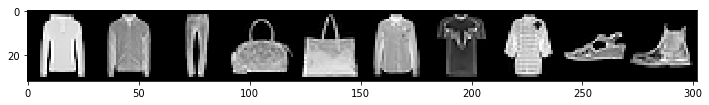

In [5]:
im = make_grid(images,nrow = 10)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

Label:  [3 0 2 1 7 4 7 2 3 0]
Class:  Dress T-shirt Sweater Trouser Sneaker Coat Sneaker Sweater Dress T-shirt


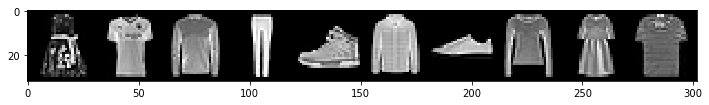

In [6]:
for images,labels in train_loader: 
    break

print('Label: ', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=10)
plt.figure(figsize=(12,4))

plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

# Downsampling
3. If a 28x28 image is passed through a Convolutional layer using a 5x5 filter, a step size of 1, and no padding, what is the resulting matrix size?

A 5x5 filter leaves a two-pixel border on each side, so the overall dimension is reduced by 4.
The result is a 24x24 matrix.

In [7]:
conv = nn.Conv2d(1,1,5,1)
for x,labels in train_loader:
    print('Orig size: ', x.shape)
    break
x = conv(x)
print('Down size:',  x.shape)

# Essentially, loosing 2 pixels on each side due to the size of the filter.


Orig size:  torch.Size([10, 1, 28, 28])
Down size: torch.Size([10, 1, 24, 24])


4. If the sample from question 3 is then passed through a 2x2 MaxPooling layer, what is the resulting matrix size?


 If a 2x2 pooling layer is applied to a 24x24 matrix, each side is divided by two, and rounded down if necessary.
The result is a 12x12 matrix

In [8]:
x = F.max_pool2d(x, 2, 2)
print('Down size:',x.shape)

Down size: torch.Size([10, 1, 12, 12])


# CNN definition
### 5. Define a convolutional neural network
Define a CNN model that can be trained on the Fashion-MNIST dataset. The model should contain two convolutional layers, two pooling layers, and two fully connected layers. You can use any number of neurons per layer so long as the model takes in a 28x28 image and returns an output of 10.

In [15]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1) # 6 filter expand 16 filter
        self.fc1 = nn.Linear(5*5*16,100)
        self.fc2 = nn.Linear(100,10)
    
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,5*5*16)  # fits into the fully connected layer
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
    
        return F.log_softmax(X,dim=1)
    
    
torch.manual_seed(101)
model = ConvolutionalNetwork()

In [16]:
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

# Trainable parameters
6. What is the total number of trainable parameters (weights & biases) in the model above?

In [11]:
for p in model.parameters():
    print(p.numel())

54
6
864
16
40000
100
1000
10


# Define loss function & optimizer

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

#  Train the model
Don't worry about tracking loss values, displaying results, or validating the test set. Just train the model through 5 epochs. We'll evaluate the trained model in the next step.

In [13]:
# DON'T WRITE HERE
epochs = 5

for i in range(epochs):
    for X_train, y_train in train_loader:

        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # OPTIONAL print statement
print(f'{i+1} of {epochs} epochs completed')

5 of 5 epochs completed


# Evaluate the model
Set model.eval() and determine the percentage correct out of 10,000 total test images.


In [14]:
# DON'T WRITE HERE
model.eval()

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_loader:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 8777/10000 =  87.770%
